<a href="https://colab.research.google.com/github/iman67/Machine-Learning-to-Predict-Energy-Consumption/blob/Iman/GoogleCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Imports
!pip install -U jupyter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.0 MB/s eta 0:00:00


In [4]:
# Importing Data
URL = 'https://raw.githubusercontent.com/MohamadNach/Machine-Learning-to-Predict-Energy-Consumption/master/events.csv'
df = pd.read_csv(URL)

In [5]:
print("Return first 5 rows.","\n")
df.head()

Return first 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
0,2015-12-31 21:00:00,2015-12-31 22:00:00,2016-01-01 00:00:00,2016-01-01 01:00:00,10800.0
1,2015-12-31 22:00:00,2015-12-31 23:00:00,2016-01-01 01:00:00,2016-01-01 02:00:00,10431.0
2,2015-12-31 23:00:00,2016-01-01 00:00:00,2016-01-01 02:00:00,2016-01-01 03:00:00,10005.0
3,2016-01-01 00:00:00,2016-01-01 01:00:00,2016-01-01 03:00:00,2016-01-01 04:00:00,9722.0
4,2016-01-01 01:00:00,2016-01-01 02:00:00,2016-01-01 04:00:00,2016-01-01 05:00:00,9599.0


In [6]:


print("Return last 5 rows.","\n")
df.tail()
     


Return last 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
52961,2021-12-31 16:00:00,2021-12-31 17:00:00,2021-12-31 19:00:00,2021-12-31 20:00:00,11447.0
52962,2021-12-31 17:00:00,2021-12-31 18:00:00,2021-12-31 20:00:00,2021-12-31 21:00:00,11237.0
52963,2021-12-31 18:00:00,2021-12-31 19:00:00,2021-12-31 21:00:00,2021-12-31 22:00:00,10914.0
52964,2021-12-31 19:00:00,2021-12-31 20:00:00,2021-12-31 22:00:00,2021-12-31 23:00:00,10599.0
52965,2021-12-31 20:00:00,2021-12-31 21:00:00,2021-12-31 23:00:00,2022-01-01 00:00:00,10812.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Start time UTC                      52966 non-null  object 
 1   End time UTC                        52966 non-null  object 
 2   Start time UTC+03:00                52966 non-null  object 
 3   End time UTC+03:00                  52966 non-null  object 
 4   Electricity consumption in Finland  52966 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [8]:
#print("Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.", "\n")
print(df.describe(), "\n")

       Electricity consumption in Finland
count                        52966.000000
mean                          9488.750519
std                           1576.241673
min                           5341.000000
25%                           8322.000000
50%                           9277.000000
75%                          10602.000000
max                          15105.000000 



In [9]:
del df["Start time UTC"]
del df["End time UTC"]
del df["Start time UTC+03:00"]
df.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in Finland":"Consumption"},inplace=True)
print(df.head(5))

              DateTime  Consumption
0  2016-01-01 01:00:00      10800.0
1  2016-01-01 02:00:00      10431.0
2  2016-01-01 03:00:00      10005.0
3  2016-01-01 04:00:00       9722.0
4  2016-01-01 05:00:00       9599.0


In [10]:
dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.week
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

<ipython-input-10-9956197795b3>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.week


In [11]:
dataset.head()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,53,Friday
2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,53,Friday
2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,53,Friday
2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,53,Friday
2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,53,Friday


In [12]:
print("")
print("Total Number of Years: ", dataset.Year.nunique() )
print(dataset.Year.unique())


Total Number of Years:  7
[2016 2017 2018 2019 2020 2021 2022]


In [13]:
# By assuming week starts on Mondey and ends on Sunday.
# The closest start would be on Monday 4-1-2016 
# The closest end would be on sunday 26-12-2021
# So we should omit first 71 rows and last 121 rows.
dataset = dataset[71:-121]
dataset.tail()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2021-12-26 19:00:00,12550.0,12,2021,2021-12-26,19:00:00,51,Sunday
2021-12-26 20:00:00,12622.0,12,2021,2021-12-26,20:00:00,51,Sunday
2021-12-26 21:00:00,12574.0,12,2021,2021-12-26,21:00:00,51,Sunday
2021-12-26 22:00:00,12384.0,12,2021,2021-12-26,22:00:00,51,Sunday
2021-12-26 23:00:00,12044.0,12,2021,2021-12-26,23:00:00,51,Sunday


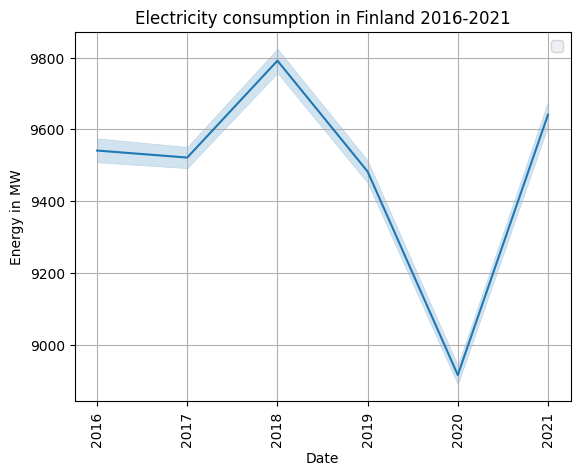

In [14]:
from matplotlib import style
fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))

style.use("ggplot")
sns.lineplot(x= dataset["Year"], y= dataset["Consumption"], data = dataset)
sns.set(rc={'figure.figsize': (20,10)})

plt.title("Electricity consumption in Finland 2016-2021")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)


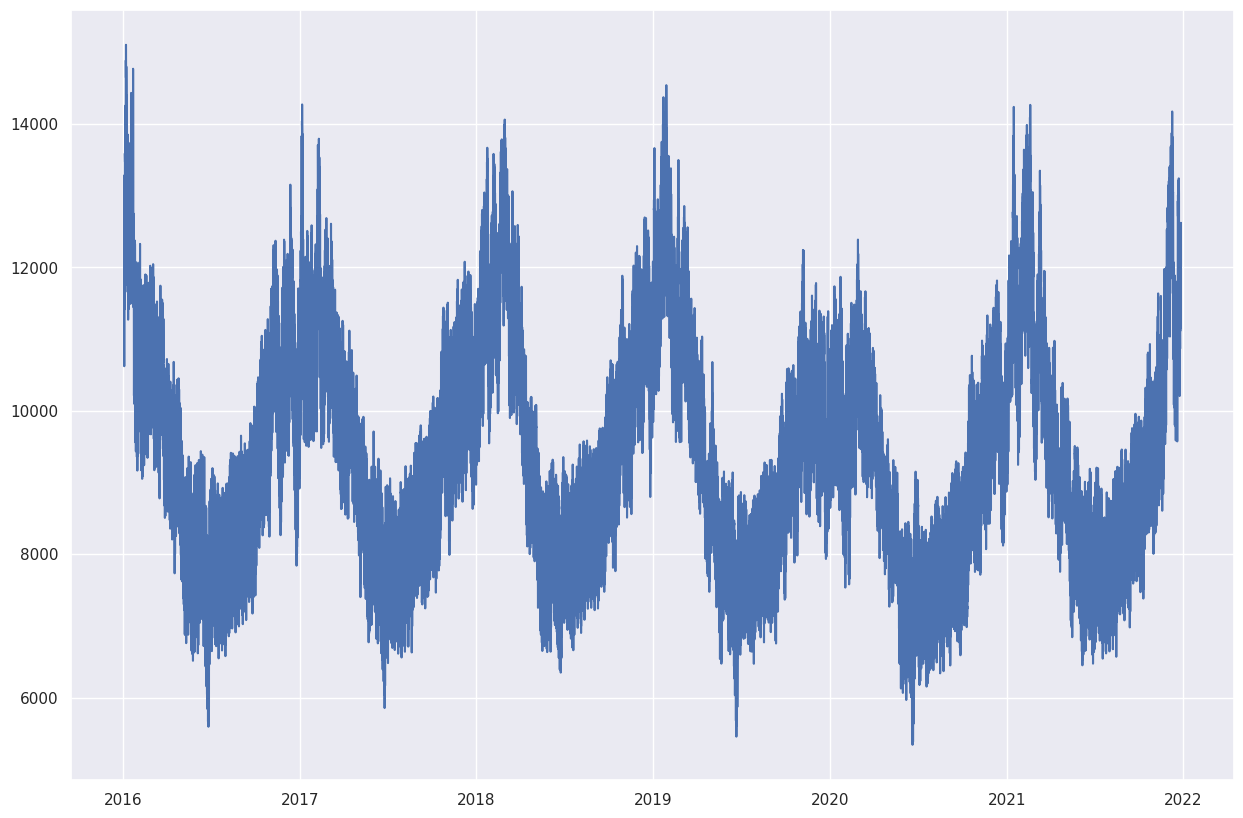

In [17]:
plt.figure(figsize=(15,10))
plt.plot(dataset["Consumption"])